<a href="https://colab.research.google.com/github/konovalny/homework/blob/dev/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = [rng() for _ in range(1000)]

# №1 Serial test

In [ ]:
k = 10
samples_X = samples[::2]
samples_Y = samples[1::2]

f_obs = (np.histogram2d(samples_X, samples_Y, [np.linspace(0, 1, k+1), np.linspace(0, 1, k+1)])[0]).reshape(k**2,)
f_exp = np.full(k**2, len(samples) // (2*k**2))

stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=114.39999999999999, pvalue=0.1380441495447643)

# №2 Реализовать permutation test и применить к выборке samples

In [ ]:
n = 1000
d = 200
k = n//d 

samples_3 = np.split(np.array(samples), d)
samples_null = np.zeros(n)


for i in range(0, n -1):
    if samples[i] > samples[i +1]: 
        samples_null[i] = 1
    
    if samples[i] < samples[i +1]: 
        samples_null[i] = -1
    
    if i % (n//d) == 0:
        samples_null[i] = 0

samples_null_2 = np.split(samples_null, d)
f_obs = np.unique(samples_null_2, return_counts = True, axis = 0)[1]
f_exp = np.full(len(f_obs) ,n // np.math.factorial(k))

f_obs, f_exp, stats.chisquare(f_obs, (np.sum(f_obs)/np.sum(f_exp))*f_exp)

(array([ 2,  5, 10,  7, 13,  1, 28, 20,  5, 10, 16, 29, 17, 10, 20,  7]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]),
 Power_divergenceResult(statistic=87.36, pvalue=3.0744962418968827e-12))

# №4 Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

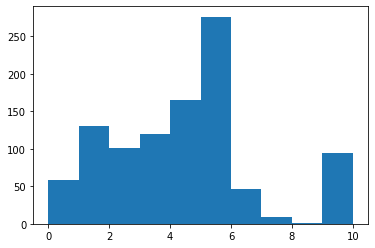

In [ ]:
weights = np.array([ 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()
weights = [weights[:k].sum() for k in range(1,11,1)]

sample = np.zeros(1000)

for i in range (1000):
    value = np.random.rand()
    j = 0
    while value >= weights[j]:
        sample[i] += 1
        j += 1


plt.hist(sample, range = (0,10)) 
plt.show()

# №5 Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

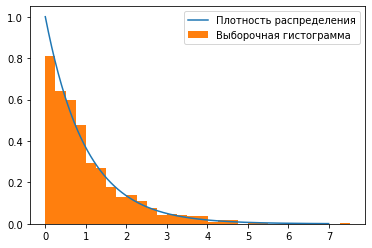

In [ ]:
from math import exp
l = 1
sampleEXP = [-(np.log(1 - np.random.rand()))/l for _ in range(1000)]

plt.plot(np.arange(0, 7, 0.01), l * np.exp(-l * np.arange(0, 7, 0.01)), label = "Плотность распределения")
plt.hist(sampleEXP, 30, density = True, label = "Выборочная гистограмма")


plt.legend()
plt.show()

# №6 Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

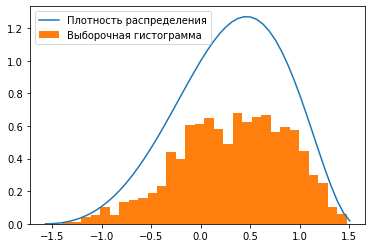

In [ ]:
limit_right = np.pi/2
limit_left = -np.pi/2

def density(x):
    return np.exp(x)*(np.cos(x))**2

sample = np.zeros(1000)
i =0
while i < 1000:
    point = np.random.rand(2)
    x = point[0]*(limit_right - limit_left)+limit_left
    y = point[1]*2
    if(y <= density(x)):
        sample[i] = x
        i += 1
        
    

X = np.arange(-np.pi/2, np.pi/2, np.pi/50)
plt.plot(X, density(X), label = "Плотность распределения")
plt.hist(sample, 30, density = True, label = "Выборочная гистограмма")

plt.legend()
plt.show()

# №7

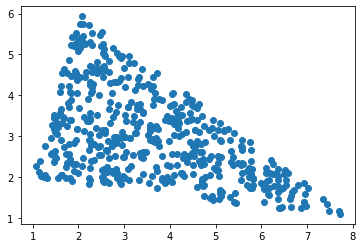

In [3]:
sample = np.zeros((500, 2))
A = np.array([1,2])
B = np.array([8,1])
C = np.array([2,6])
AB = B - A
AC = C - A
i = 0
for i in range (500):
    point = np.random.rand(2)
    x = point[0]
    y = point[1]
    if (x+y > 1):
        x, y = 1-x, 1-y
    sample[i] = A + x*AB + y*AC


plt.scatter (sample[:, 0], sample[:, 1])
plt.show()

# №8 Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

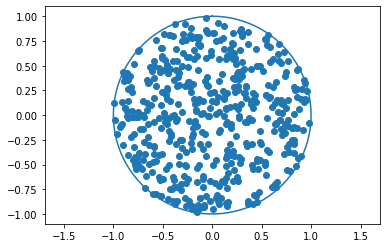

In [5]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

#благодаря извлечению корня выборка действительно равномерная (РЕЗУЛЬТАТ ИЗ МАТЕМАТИКИ)
length = np.sqrt(np.random.uniform(0,1,500))
angle = np.pi * np.random.uniform(0,2,500)

x = length*np.cos(angle)
y = length*np.sin(angle)

plt.scatter(x, y)
plt.show()

# №9

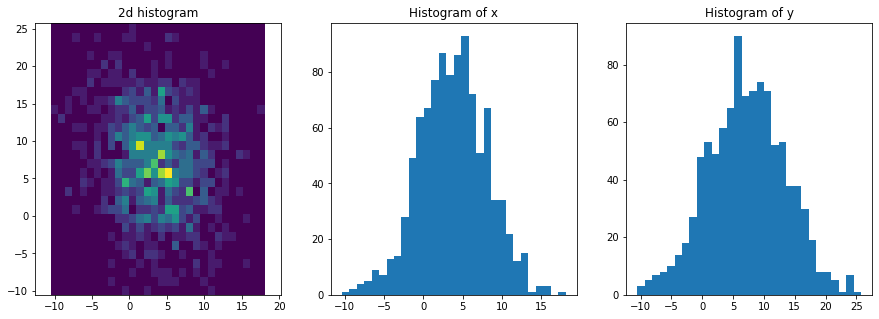

[[18.43891337 -4.45707635]
 [-4.45707635 38.95428289]]


In [7]:
def z_0(x, y):    
    s = x*x+y*y
    return x*np.sqrt((-2*np.log(s))/s)
def z_1(x, y):
    s = x*x+y*y
    return y*np.sqrt((-2*np.log(s))/s)


sample_x = np.zeros(1000)
sample_y = np.zeros(1000)
i =0
while i < 1000:
    point = np.random.rand(2)
    x = 2*point[0]-1
    y = 2*point[1]-1
    if x*x+y*y <= 1:
        sample_x[i]=4 + (-2)*z_0(x,y) + 4*z_1(x,y)
        sample_y[i]=7 + 6*z_0(x,y) + 2*z_1(x,y)
        i+=1


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(sample_x, sample_y, bins=30)
ax[0].axis('equal')
ax[1].hist(sample_x, bins=30)
ax[2].hist(sample_y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

print(np.cov(sample_x, sample_y))